In [15]:
# 라이브러리 불러오기
import torch
import cv2
import numpy as np

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))

Using device: cuda
Tesla K80


In [16]:
# User Input   
threshold = 0.5


pytorch yolov5 페이지

https://pytorch.org/hub/ultralytics_yolov5/

In [3]:
# Yolov5는 torch hub에서 불러올 수 있음
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5x, custom

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-10-21 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
img = cv2.imread('soccer.jpg')

In [5]:
res = model(img)   #pytorch 모델 적용

In [6]:
dir(res)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'crop',
 'display',
 'files',
 'imgs',
 'n',
 'names',
 'pandas',
 'pred',
 'print',
 'render',
 's',
 'save',
 'show',
 't',
 'tolist',
 'xywh',
 'xywhn',
 'xyxy',
 'xyxyn']

In [7]:
res.print()

image 1/1: 667x1200 4 persons, 1 sports ball
Speed: 9.4ms pre-process, 33.6ms inference, 2.8ms NMS per image at shape (1, 3, 384, 640)


In [8]:
res.imgs

[array([[[ 88, 148, 124],
         [ 88, 148, 124],
         [ 88, 148, 124],
         ...,
         [ 54, 130, 106],
         [ 54, 130, 106],
         [ 54, 130, 106]],
 
        [[ 88, 148, 124],
         [ 88, 148, 124],
         [ 88, 148, 124],
         ...,
         [ 52, 130, 106],
         [ 54, 130, 106],
         [ 52, 130, 106]],
 
        [[ 89, 149, 125],
         [ 89, 149, 125],
         [ 88, 148, 124],
         ...,
         [ 50, 131, 106],
         [ 52, 130, 106],
         [ 50, 131, 106]],
 
        ...,
 
        [[ 42, 147, 126],
         [ 50, 155, 134],
         [ 46, 151, 130],
         ...,
         [ 59, 154, 134],
         [ 52, 149, 129],
         [ 48, 145, 125]],
 
        [[ 32, 137, 116],
         [ 47, 152, 131],
         [ 56, 161, 140],
         ...,
         [ 55, 150, 130],
         [ 53, 150, 130],
         [ 56, 153, 133]],
 
        [[ 23, 128, 107],
         [ 39, 144, 123],
         [ 54, 159, 138],
         ...,
         [ 51, 146, 126],
  

In [9]:
type(res.imgs)

list

In [10]:
len(res.imgs)

1

In [11]:
res.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,111.914055,4.437500,403.124969,481.624969,0.938965,0,person
1,395.859344,25.296873,761.249939,656.937439,0.899902,0,person
2,741.562439,610.999939,835.312439,667.000000,0.861816,32,sports ball
3,719.531189,33.968746,1059.374878,595.062439,0.830566,0,person
4,984.374939,0.921875,1078.124878,278.421875,0.635254,0,person


In [12]:
names = res.names

In [13]:
# Adding Box
# xyxy의 결과값은 startx, starty, endx, endy, confidenc, class
boxes = res.xyxy[0].cpu().numpy() # pytorch에서 gpu 사용시에는 numpy로 변경 방법
for box in boxes:
    if box[4]> threshold :
        cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (0, 0, 255), 2)                    
        title = names[int(box[5])]
        prob = round(box[4] * 100,1)
        img = cv2.putText(img, title + ' ' + str(prob) + '%', (int(box[0]), int(box[1])-10), 
                          cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)

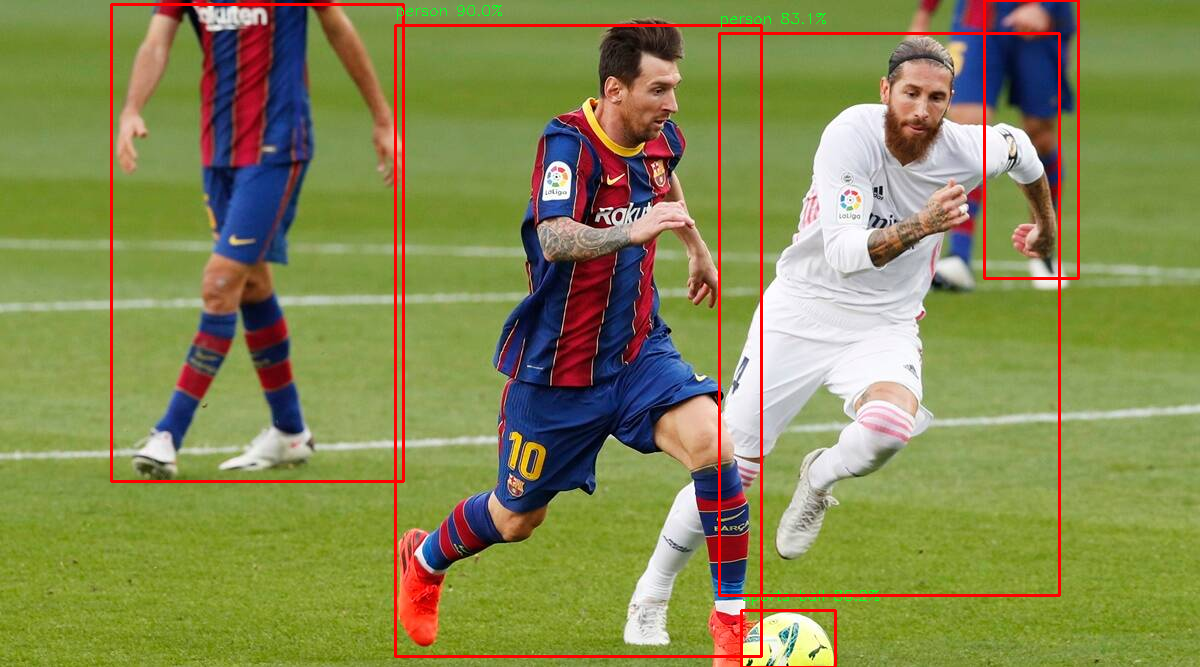

In [14]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)